# Salary Predication

In [1]:
# import required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Reading

In [2]:
# import dataset

df = pd.read_csv(r'C:\Users\admin\Desktop\train.csv');
df.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [3]:
# remove unused columns

df = df.drop(['ID','fnlwgt','education-num'],axis=1);
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,60,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,28,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,71,Self-emp-not-inc,1st-4th,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,75,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,50,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


## Feature Engineering

In [4]:
# see details of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32724 entries, 0 to 32723
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32724 non-null  int64 
 1   workclass       30829 non-null  object
 2   education       32724 non-null  object
 3   marital-status  32724 non-null  object
 4   occupation      30823 non-null  object
 5   relationship    32724 non-null  object
 6   race            32724 non-null  object
 7   gender          32724 non-null  object
 8   capital-gain    32724 non-null  int64 
 9   capital-loss    32724 non-null  int64 
 10  hours-per-week  32724 non-null  int64 
 11  native-country  32156 non-null  object
 12  net-income      32724 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
# check is there any null value in dataset

df.isnull().sum()

age                  0
workclass         1895
education            0
marital-status       0
occupation        1901
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     568
net-income           0
dtype: int64

In [6]:
# How many missing values are there

features_with_na =  [feature for feature in df.columns if df[feature].isnull().sum()>1]
print(features_with_na)

['workclass', 'occupation', 'native-country']


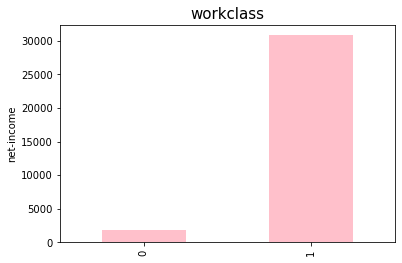

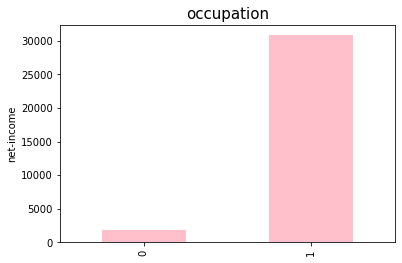

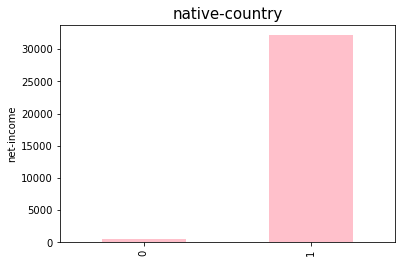

In [7]:
# draw graph for null values

for feature in features_with_na:
    
    data = df.copy()
      #let's put 0 for empty values and 1 for non-empty values in our feature column
    data[feature] = np.where(df[feature].isnull(),"0","1")
    #let's calculate the mean salesprice where  the information is missing or 
    data.groupby(feature)['net-income'].count().mode().plot(kind='bar',color='pink')
    plt.title(feature,fontsize=15)
    plt.ylabel("net-income",fontsize=10)
    plt.show()



### from the above charts we can say that the null values are very negligible as compared to not null values. So we can drop null values it will not affect our traning and testing dataset.

In [8]:
# drop null values

df = df.dropna(axis=1)
df.isnull().sum()

age               0
education         0
marital-status    0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
net-income        0
dtype: int64

In [9]:
# Feature Selection

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
# Now separate the categorical and continuous variable

# numeric values from dataset

numerical_feature = [feature for feature in x.columns if df[feature].dtypes != 'O']
print("Number of numerical values : ", len(numerical_feature))

df[numerical_feature].head()

Number of numerical values :  4


,age,capital-gain,capital-loss,hours-per-week
0,60,0,0,48
1,28,0,0,63
2,71,0,0,28
3,75,0,0,8
4,50,0,1887,50


In [11]:
# Categoric Data
categorical_feature=[feature for feature in x.columns if df[feature].dtypes == 'O']

print("Number of categorical values : ", len(categorical_feature))

df[categorical_feature].head()

Number of categorical values :  5


,education,marital-status,relationship,race,gender
0,HS-grad,Married-civ-spouse,Husband,White,Male
1,Some-college,Married-civ-spouse,Own-child,Asian-Pac-Islander,Male
2,1st-4th,Divorced,Not-in-family,White,Female
3,HS-grad,Widowed,Not-in-family,White,Female
4,Bachelors,Married-civ-spouse,Husband,White,Male


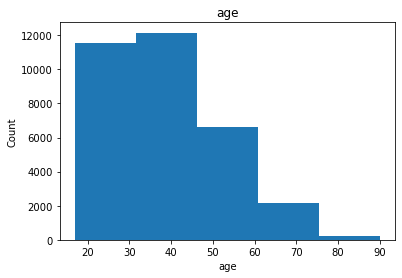

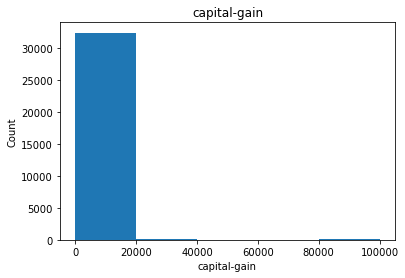

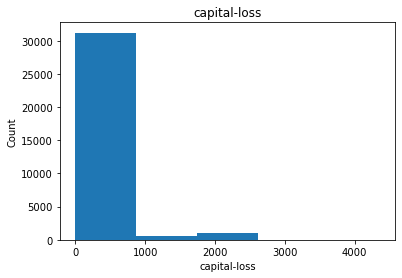

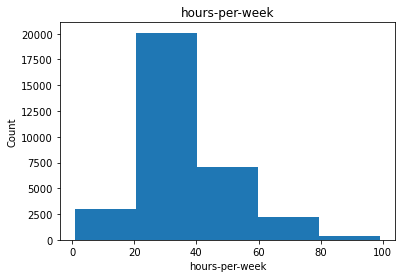

In [12]:
# numerica distribution

for feature in numerical_feature:
    data = df.copy()
    
    data[feature].hist(bins=5,grid=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

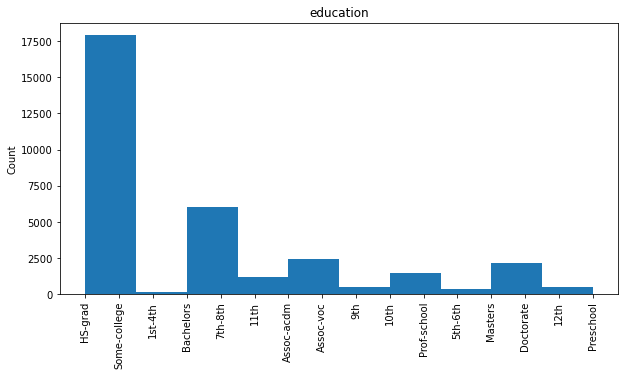

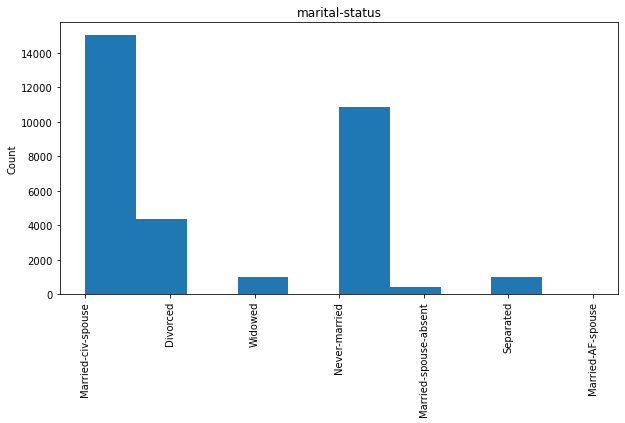

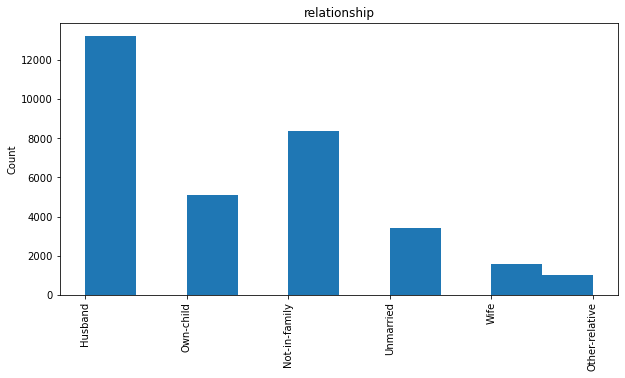

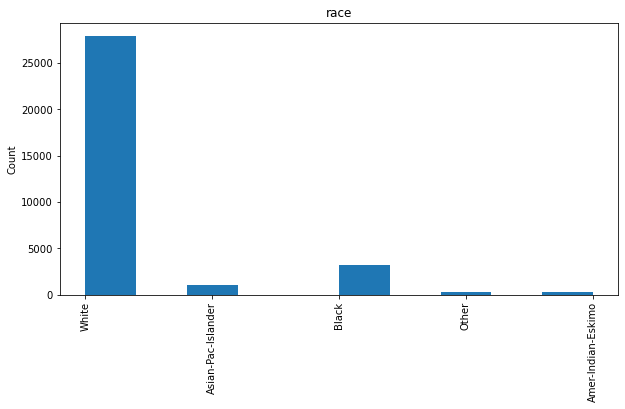

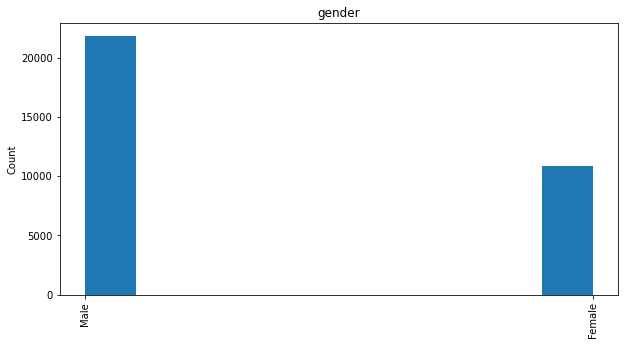

In [13]:
for feature in categorical_feature:
    data = df.copy()
    plt.figure(figsize=(10,5))
    data[feature].hist(grid=False)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

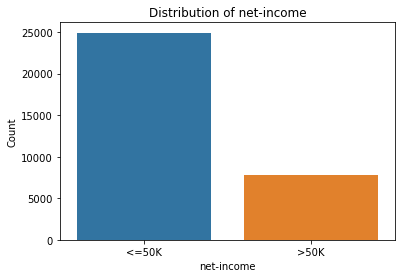

In [14]:
#  Target distribution

sns.countplot(df.iloc[:,-1])
plt.ylabel("Count")
plt.title("Distribution of net-income")
plt.show()

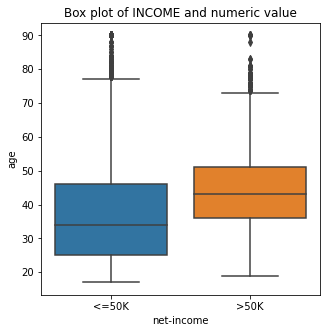

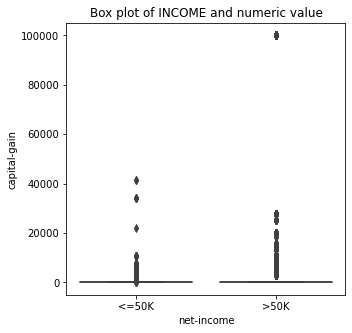

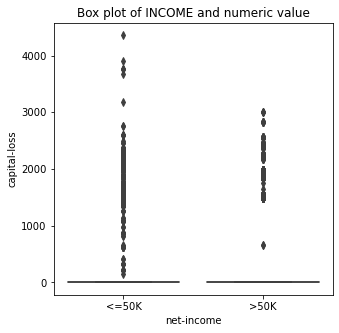

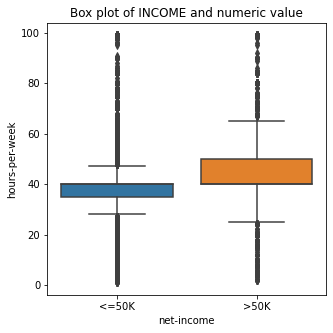

In [15]:
for feature in numerical_feature:
    fig = plt.figure(figsize=(5,5))
    sns.boxplot(x=df['net-income'],y=feature,data=df).set_title('Box plot of INCOME and numeric value')
    plt.show()

## Modeling

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label = LabelEncoder()

In [18]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = label.fit_transform(df[feature])

In [19]:
df.head()

,age,education,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,net-income
0,60,11,2,0,4,1,0,0,48,0
1,28,15,2,3,1,1,0,0,63,0
2,71,3,0,1,4,0,0,0,28,0
3,75,11,6,1,4,0,0,0,8,0
4,50,9,2,0,4,1,0,1887,50,1


In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
# import train and test model to split data into train and test

from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [23]:
x.describe()

,age,education,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000
mean,38.574257,10.288229,2.626085,1.442580,3.665689,0.667492,1078.228792,87.700403,40.406216
std,13.712166,3.872393,1.502077,1.602617,0.848277,0.471119,7480.459910,401.872849,12.454379
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,11.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,15.000000,6.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000


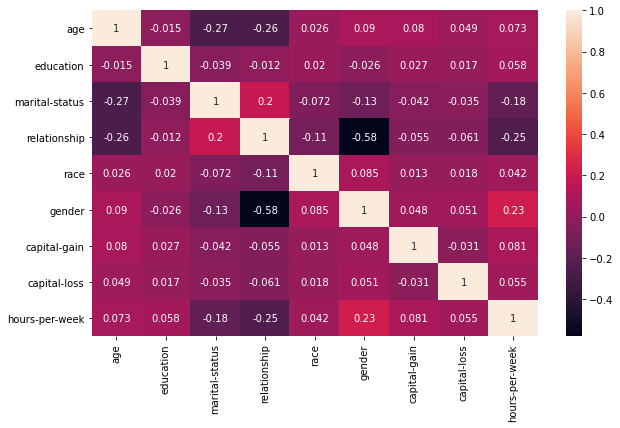

In [24]:
# corrmat = df.drop(['net-income'] , axis = 1).corr()

fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(x.corr(), data = df , annot = True)
plt.show()

In [25]:
# transform values

from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.fit_transform(X_test)

Linear Regression

In [26]:
# import model

from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
model.score(X_test,y_test)

0.799694423223835

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [29]:
clf_tree.score( X_test,y_test)

0.8161955691367456

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors = 5)
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
KNNmodel.score(X_test,y_test)

0.8276546982429336

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:

model.score(X_test,y_test)

0.8342245989304813

# From all these algorithums we can see the Random Forest gives us maximum accuracy i.e 84% 